# API wrappers

-- create a collection of songs with their audio features - as large as possible!

1. These are the songs that we will cluster. 
2. And, later, when the user inputs a song, we will find the cluster to which the song belongs and recommend a song from the same cluster. 

-- you might want to make sure the collected songs are "curated" in a certain way. Try to find playlists of songs that are diverse, but also that meet certain standards.

An idea for collecting as many songs as possible is 
1. to start with all the songs of a big, diverse playlist and 
2. then go to every artist present in the playlist and grab every song of every album of that artist. 


In [1]:
import pandas as pd
import numpy as np
import sys
import pandas as pd
import json
import requests

In [2]:
#df_songs = pd.read_csv('df_songs.csv')

In [3]:
df_songs =  pd.read_csv('c:/Users/kyear/Documents/Personal/Education/Ironhack/31_Python.Webscaping/topsongs_db.csv')

In [4]:
df_songs

,rank,artist,song,chart week
0,1,Olivia Rodrigo,Drivers License,2021-02-23
1,2,Cardi B,Up,2021-02-23
2,3,The Weeknd,Blinding Lights,2021-02-23
3,4,The Weeknd,Save Your Tears,2021-02-23
4,5,24kGoldn Featuring iann dior,Mood,2021-02-23
...,...,...,...,...
95,96,Jordan Davis,Almost Maybes,2021-02-23
96,97,DaBaby,Masterpiece,2021-02-23
97,98,Miley Cyrus Featuring Dua Lipa,Prisoner,2021-02-23
98,99,Sabrina Carpenter,Skin,2021-02-23


In [5]:
df_songs = df_songs.drop(['rank'], axis=1)

In [6]:
#not working

#df_songs.drop(columns='Unnamed: 0', inplace=True) 
#df_songs = df_songs.drop_duplicates()

In [7]:
df_songs

,artist,song,chart week
0,Olivia Rodrigo,Drivers License,2021-02-23
1,Cardi B,Up,2021-02-23
2,The Weeknd,Blinding Lights,2021-02-23
3,The Weeknd,Save Your Tears,2021-02-23
4,24kGoldn Featuring iann dior,Mood,2021-02-23
...,...,...,...
95,Jordan Davis,Almost Maybes,2021-02-23
96,DaBaby,Masterpiece,2021-02-23
97,Miley Cyrus Featuring Dua Lipa,Prisoner,2021-02-23
98,Sabrina Carpenter,Skin,2021-02-23


In [8]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

sys.path.insert(1, 'c:/Users/kyear/Documents/Personal/Education/Ironhack/32_API')

from config import * # config.py


#Initialize SpotiPy with user credentias
#analyse
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= Client_ID,
                                                           client_secret= Client_Secret))

In [9]:
from time import sleep

def get_song_features(dataframe):
    dataframe = dataframe[0:100]

    for i in range(len(dataframe)):
        print(i)
        results = sp.search(q=i, limit=1)
        results["tracks"]["items"][0]["uri"]
#         wait_time = np.random.randint(1,3)
#         print("I will sleep for " + str(wait_time) + " seconds.")
#         sleep(wait_time)

        results = sp.audio_features(results["tracks"]["items"][0]["uri"])
    

        for key in results[0]:
            dataframe.loc[i, key] = results[0][key]
#             print( results[0][key] )
        


        
    return dataframe

In [10]:
df_songs = get_song_features(df_songs)

0


C:\Users\kyear\Programs\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kyear\Programs\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [11]:
df_songs

,artist,song,chart week,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Olivia Rodrigo,Drivers License,2021-02-23,0.559,0.7160,11.0,-3.964,0.0,0.3900,0.73700,...,0.2520,0.5040,176.618,audio_features,4jtyUzZm9WLc2AdaJ1dso7,spotify:track:4jtyUzZm9WLc2AdaJ1dso7,https://api.spotify.com/v1/tracks/4jtyUzZm9WLc...,https://api.spotify.com/v1/audio-analysis/4jty...,275227.0,4.0
1,Cardi B,Up,2021-02-23,0.654,0.6300,10.0,-4.644,1.0,0.0259,0.15300,...,0.1110,0.4300,89.991,audio_features,2wrJq5XKLnmhRXHIAf9xBa,spotify:track:2wrJq5XKLnmhRXHIAf9xBa,https://api.spotify.com/v1/tracks/2wrJq5XKLnmh...,https://api.spotify.com/v1/audio-analysis/2wrJ...,167693.0,4.0
2,The Weeknd,Blinding Lights,2021-02-23,0.783,0.4790,7.0,-10.646,1.0,0.5410,0.14900,...,0.1010,0.5330,176.027,audio_features,3JKgcAa7r07ocVWcV8bS0H,spotify:track:3JKgcAa7r07ocVWcV8bS0H,https://api.spotify.com/v1/tracks/3JKgcAa7r07o...,https://api.spotify.com/v1/audio-analysis/3JKg...,163798.0,4.0
3,The Weeknd,Save Your Tears,2021-02-23,0.830,0.5850,0.0,-6.476,1.0,0.0940,0.23700,...,0.2480,0.4850,109.978,audio_features,6Im9k8u9iIzKMrmV7BWtlF,spotify:track:6Im9k8u9iIzKMrmV7BWtlF,https://api.spotify.com/v1/tracks/6Im9k8u9iIzK...,https://api.spotify.com/v1/audio-analysis/6Im9...,173711.0,4.0
4,24kGoldn Featuring iann dior,Mood,2021-02-23,0.813,0.5570,10.0,-6.655,0.0,0.1330,0.05470,...,0.1280,0.7640,83.012,audio_features,4wmZtoif8SGm7PDqgKrEXr,spotify:track:4wmZtoif8SGm7PDqgKrEXr,https://api.spotify.com/v1/tracks/4wmZtoif8SGm...,https://api.spotify.com/v1/audio-analysis/4wmZ...,104912.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Jordan Davis,Almost Maybes,2021-02-23,0.883,0.5400,5.0,-9.972,1.0,0.0351,0.02380,...,0.0409,0.9060,109.930,audio_features,6S7FhjeIvnVM18vzW6Di7R,spotify:track:6S7FhjeIvnVM18vzW6Di7R,https://api.spotify.com/v1/tracks/6S7FhjeIvnVM...,https://api.spotify.com/v1/audio-analysis/6S7F...,168670.0,4.0
96,DaBaby,Masterpiece,2021-02-23,0.154,0.0244,11.0,-30.859,1.0,0.0399,0.98500,...,0.1090,0.0336,137.961,audio_features,6pxUCNb8Yrv0sIeIc6IO7D,spotify:track:6pxUCNb8Yrv0sIeIc6IO7D,https://api.spotify.com/v1/tracks/6pxUCNb8Yrv0...,https://api.spotify.com/v1/audio-analysis/6pxU...,107864.0,4.0
97,Miley Cyrus Featuring Dua Lipa,Prisoner,2021-02-23,0.462,0.5170,1.0,-12.017,1.0,0.3690,0.47000,...,0.1470,0.6560,79.585,audio_features,1qzlwbV6SwHYOR3mhu6ZEd,spotify:track:1qzlwbV6SwHYOR3mhu6ZEd,https://api.spotify.com/v1/tracks/1qzlwbV6SwHY...,https://api.spotify.com/v1/audio-analysis/1qzl...,250737.0,4.0
98,Sabrina Carpenter,Skin,2021-02-23,0.608,0.5900,1.0,-12.100,0.0,0.7520,0.44000,...,0.3270,0.9070,175.800,audio_features,6EEqI230VaiijRggRAL3rR,spotify:track:6EEqI230VaiijRggRAL3rR,https://api.spotify.com/v1/tracks/6EEqI230Vaii...,https://api.spotify.com/v1/audio-analysis/6EEq...,129693.0,4.0


# Unsupervised learning intro

-- ultimate goal: to improve the recommendations of artists. 
-- Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

1. Check whether or not the song is in the Billboard Hot 200.
2. Collect the audio features from the Spotify API.
3. After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

## Check whether or not the song is in the Billboard Hot 200.

In [12]:
user_song = input('Input a song')

Input a songDrive


In [13]:
def recommendator(track):
    if track in df_songs['song'].values:
        # checking that it works
        print('Hot!')
        
        # getting the index of the song
        index = np.where(df_songs['song'].values == track)
        index = int(index[0])
        
        
        
    else:
        print('Cold!')

In [14]:
recommendator(user_song)

Cold!


## Collect the audio features from the Spotify API.

In [15]:
df_songs.drop(columns='analysis_url', inplace=True) 
df_songs.drop(columns='type', inplace=True)
df_songs.drop(columns='track_href', inplace=True) 

C:\Users\kyear\Programs\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
df_songs

,artist,song,chart week,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,duration_ms,time_signature
0,Olivia Rodrigo,Drivers License,2021-02-23,0.559,0.7160,11.0,-3.964,0.0,0.3900,0.73700,0.000,0.2520,0.5040,176.618,4jtyUzZm9WLc2AdaJ1dso7,spotify:track:4jtyUzZm9WLc2AdaJ1dso7,275227.0,4.0
1,Cardi B,Up,2021-02-23,0.654,0.6300,10.0,-4.644,1.0,0.0259,0.15300,0.000,0.1110,0.4300,89.991,2wrJq5XKLnmhRXHIAf9xBa,spotify:track:2wrJq5XKLnmhRXHIAf9xBa,167693.0,4.0
2,The Weeknd,Blinding Lights,2021-02-23,0.783,0.4790,7.0,-10.646,1.0,0.5410,0.14900,0.000,0.1010,0.5330,176.027,3JKgcAa7r07ocVWcV8bS0H,spotify:track:3JKgcAa7r07ocVWcV8bS0H,163798.0,4.0
3,The Weeknd,Save Your Tears,2021-02-23,0.830,0.5850,0.0,-6.476,1.0,0.0940,0.23700,0.000,0.2480,0.4850,109.978,6Im9k8u9iIzKMrmV7BWtlF,spotify:track:6Im9k8u9iIzKMrmV7BWtlF,173711.0,4.0
4,24kGoldn Featuring iann dior,Mood,2021-02-23,0.813,0.5570,10.0,-6.655,0.0,0.1330,0.05470,0.000,0.1280,0.7640,83.012,4wmZtoif8SGm7PDqgKrEXr,spotify:track:4wmZtoif8SGm7PDqgKrEXr,104912.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Jordan Davis,Almost Maybes,2021-02-23,0.883,0.5400,5.0,-9.972,1.0,0.0351,0.02380,0.016,0.0409,0.9060,109.930,6S7FhjeIvnVM18vzW6Di7R,spotify:track:6S7FhjeIvnVM18vzW6Di7R,168670.0,4.0
96,DaBaby,Masterpiece,2021-02-23,0.154,0.0244,11.0,-30.859,1.0,0.0399,0.98500,0.954,0.1090,0.0336,137.961,6pxUCNb8Yrv0sIeIc6IO7D,spotify:track:6pxUCNb8Yrv0sIeIc6IO7D,107864.0,4.0
97,Miley Cyrus Featuring Dua Lipa,Prisoner,2021-02-23,0.462,0.5170,1.0,-12.017,1.0,0.3690,0.47000,0.000,0.1470,0.6560,79.585,1qzlwbV6SwHYOR3mhu6ZEd,spotify:track:1qzlwbV6SwHYOR3mhu6ZEd,250737.0,4.0
98,Sabrina Carpenter,Skin,2021-02-23,0.608,0.5900,1.0,-12.100,0.0,0.7520,0.44000,0.000,0.3270,0.9070,175.800,6EEqI230VaiijRggRAL3rR,spotify:track:6EEqI230VaiijRggRAL3rR,129693.0,4.0


## Send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

In [17]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
df_songs

,artist,song,chart week,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,duration_ms,time_signature
0,Olivia Rodrigo,Drivers License,2021-02-23,0.559,0.7160,11.0,-3.964,0.0,0.3900,0.73700,0.000,0.2520,0.5040,176.618,4jtyUzZm9WLc2AdaJ1dso7,spotify:track:4jtyUzZm9WLc2AdaJ1dso7,275227.0,4.0
1,Cardi B,Up,2021-02-23,0.654,0.6300,10.0,-4.644,1.0,0.0259,0.15300,0.000,0.1110,0.4300,89.991,2wrJq5XKLnmhRXHIAf9xBa,spotify:track:2wrJq5XKLnmhRXHIAf9xBa,167693.0,4.0
2,The Weeknd,Blinding Lights,2021-02-23,0.783,0.4790,7.0,-10.646,1.0,0.5410,0.14900,0.000,0.1010,0.5330,176.027,3JKgcAa7r07ocVWcV8bS0H,spotify:track:3JKgcAa7r07ocVWcV8bS0H,163798.0,4.0
3,The Weeknd,Save Your Tears,2021-02-23,0.830,0.5850,0.0,-6.476,1.0,0.0940,0.23700,0.000,0.2480,0.4850,109.978,6Im9k8u9iIzKMrmV7BWtlF,spotify:track:6Im9k8u9iIzKMrmV7BWtlF,173711.0,4.0
4,24kGoldn Featuring iann dior,Mood,2021-02-23,0.813,0.5570,10.0,-6.655,0.0,0.1330,0.05470,0.000,0.1280,0.7640,83.012,4wmZtoif8SGm7PDqgKrEXr,spotify:track:4wmZtoif8SGm7PDqgKrEXr,104912.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Jordan Davis,Almost Maybes,2021-02-23,0.883,0.5400,5.0,-9.972,1.0,0.0351,0.02380,0.016,0.0409,0.9060,109.930,6S7FhjeIvnVM18vzW6Di7R,spotify:track:6S7FhjeIvnVM18vzW6Di7R,168670.0,4.0
96,DaBaby,Masterpiece,2021-02-23,0.154,0.0244,11.0,-30.859,1.0,0.0399,0.98500,0.954,0.1090,0.0336,137.961,6pxUCNb8Yrv0sIeIc6IO7D,spotify:track:6pxUCNb8Yrv0sIeIc6IO7D,107864.0,4.0
97,Miley Cyrus Featuring Dua Lipa,Prisoner,2021-02-23,0.462,0.5170,1.0,-12.017,1.0,0.3690,0.47000,0.000,0.1470,0.6560,79.585,1qzlwbV6SwHYOR3mhu6ZEd,spotify:track:1qzlwbV6SwHYOR3mhu6ZEd,250737.0,4.0
98,Sabrina Carpenter,Skin,2021-02-23,0.608,0.5900,1.0,-12.100,0.0,0.7520,0.44000,0.000,0.3270,0.9070,175.800,6EEqI230VaiijRggRAL3rR,spotify:track:6EEqI230VaiijRggRAL3rR,129693.0,4.0


In [19]:
df_songs.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.615960,0.584172,5.120000,-9.169590,0.640000,0.169592,0.298659,0.121325,0.160064,0.426043,125.128710,205329.930000,3.970000
std,0.199052,0.227359,3.343258,6.447131,0.482418,0.168567,0.318318,0.288430,0.128803,0.231732,33.779546,76355.923153,0.222702
min,0.142000,0.001620,0.000000,-30.859000,0.000000,0.024800,0.000006,0.000000,0.037000,0.033600,66.172000,30579.000000,3.000000
25%,0.497750,0.486750,2.000000,-9.957750,0.000000,0.045250,0.067400,0.000000,0.100325,0.245000,95.518500,163798.000000,4.000000
50%,0.645000,0.585000,6.000000,-7.070500,1.000000,0.089200,0.149000,0.000001,0.113000,0.412500,123.180500,193458.000000,4.000000
75%,0.781500,0.719250,7.250000,-5.476500,1.000000,0.285000,0.455750,0.000289,0.167750,0.603000,146.549000,243578.500000,4.000000
max,0.932000,0.989000,11.000000,-2.819000,1.000000,0.844000,0.986000,0.954000,0.890000,0.965000,206.247000,517810.000000,5.000000


In [20]:
df_songs.dtypes

artist               object
song                 object
chart week           object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
id                   object
uri                  object
duration_ms         float64
time_signature      float64
dtype: object

----

In [61]:

# Data cleaning:
#download from kaggle

spotify_dataset = pd.read_csv('c:/Users/kyear/Documents/Personal/Education/Ironhack/34_UNsupLearning/spotify_kaggle_dataset.csv')
spotify_dataset

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


In [62]:
#dropartist_song
spotify_dataset = spotify_dataset.drop(['id', 'popularity','release_date'], axis=1)

spotify_dataset.rename(columns={'name': 'song', 'artists': 'artist'}, inplace=True)

In [65]:
#remove speech marks: 

spotify_dataset['artist'] = list(map(lambda x: x.replace("['",""),spotify_dataset['artist']))

spotify_dataset['artist'] = list(map(lambda x: x.replace("']",""),spotify_dataset['artist']))

spotify_dataset['artist'] = list(map(lambda x: x.replace('"]',''),spotify_dataset['artist']))

spotify_dataset['artist'] = list(map(lambda x: x.replace('["',''),spotify_dataset['artist']))

spotify_dataset

,acousticness,artist,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,song,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,0.0936,149.976,0.6340,1920
1,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,Golfing Papa,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,Xuniverxe,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"DJ Combo', 'Sander-7', 'Tony T",0.792,147615,0.866,0,0.000060,6,0.1780,-5.089,0,The One,0.0356,125.972,0.1860,2020
174385,0.795000,Alessia Cara,0.429,144720,0.211,0,0.000000,4,0.1960,-11.665,1,A Little More,0.0360,94.710,0.2280,2021
174386,0.806000,Roger Fly,0.671,218147,0.589,0,0.920000,4,0.1130,-12.393,0,Together,0.0282,108.058,0.7140,2020
174387,0.920000,Taylor Swift,0.462,244000,0.240,1,0.000000,0,0.1130,-12.077,1,champagne problems,0.0377,171.319,0.3200,2021


In [59]:
spotify_dataset

,acousticness,artist,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,song,speechiness,tempo,valence,year
0,0.991000,'Mamie Smith'],0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,0.0936,149.976,0.6340,1920
1,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,0.0534,86.889,0.9500,1920
2,0.993000,'Mamie Smith'],0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,Golfing Papa,0.1740,97.600,0.6890,1920
3,0.000173,'Oscar Velazquez'],0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,0.0425,127.997,0.0422,1920
4,0.295000,'Mixe'],0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,Xuniverxe,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"'DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,0.000060,6,0.1780,-5.089,0,The One,0.0356,125.972,0.1860,2020
174385,0.795000,'Alessia Cara'],0.429,144720,0.211,0,0.000000,4,0.1960,-11.665,1,A Little More,0.0360,94.710,0.2280,2021
174386,0.806000,'Roger Fly'],0.671,218147,0.589,0,0.920000,4,0.1130,-12.393,0,Together,0.0282,108.058,0.7140,2020
174387,0.920000,'Taylor Swift'],0.462,244000,0.240,1,0.000000,0,0.1130,-12.077,1,champagne problems,0.0377,171.319,0.3200,2021


In [46]:
spotify_dataset.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

-----

In [21]:
X = df_songs.select_dtypes('float64')

In [22]:
X_prep = df_songs.select_dtypes('float64')

In [23]:
X_prep

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.559,0.7160,11.0,-3.964,0.0,0.3900,0.73700,0.000,0.2520,0.5040,176.618,275227.0,4.0
1,0.654,0.6300,10.0,-4.644,1.0,0.0259,0.15300,0.000,0.1110,0.4300,89.991,167693.0,4.0
2,0.783,0.4790,7.0,-10.646,1.0,0.5410,0.14900,0.000,0.1010,0.5330,176.027,163798.0,4.0
3,0.830,0.5850,0.0,-6.476,1.0,0.0940,0.23700,0.000,0.2480,0.4850,109.978,173711.0,4.0
4,0.813,0.5570,10.0,-6.655,0.0,0.1330,0.05470,0.000,0.1280,0.7640,83.012,104912.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.883,0.5400,5.0,-9.972,1.0,0.0351,0.02380,0.016,0.0409,0.9060,109.930,168670.0,4.0
96,0.154,0.0244,11.0,-30.859,1.0,0.0399,0.98500,0.954,0.1090,0.0336,137.961,107864.0,4.0
97,0.462,0.5170,1.0,-12.017,1.0,0.3690,0.47000,0.000,0.1470,0.6560,79.585,250737.0,4.0
98,0.608,0.5900,1.0,-12.100,0.0,0.7520,0.44000,0.000,0.3270,0.9070,175.800,129693.0,4.0


In [24]:
X_prep = StandardScaler().fit_transform(X_prep)

In [25]:
pd.DataFrame(X_prep, columns=X.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.287598,0.582743,1.767624,0.811495,-1.333333,1.314127,1.383990,-0.422759,0.717367,0.338104,1.531953,0.920023,0.135388
1,0.192069,0.202581,1.467008,0.705490,0.750000,-0.856727,-0.459895,-0.422759,-0.382841,0.017162,-1.045447,-0.495398,0.135388
2,0.843405,-0.464912,0.565159,-0.230156,0.750000,2.214427,-0.472524,-0.422759,-0.460870,0.463879,1.514369,-0.546666,0.135388
3,1.080714,0.003659,-1.539155,0.419902,0.750000,-0.450698,-0.194678,-0.422759,0.686155,0.255700,-0.450777,-0.416185,0.135388
4,0.994879,-0.120114,1.467008,0.391997,-1.333333,-0.218171,-0.770261,-0.422759,-0.250192,1.465741,-1.253092,-1.321755,0.135388


In [26]:
# test model
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [27]:
# get the clusters and how many observations has each cluster.
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    21
1     8
2    10
3    20
4    18
5     4
6    11
7     8
dtype: int64

In [28]:
# checking in which group they are
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.559,0.716,11.0,-3.964,0.0,0.3900,0.7370,0.0,0.252,0.504,176.618,275227.0,4.0,6
1,0.654,0.630,10.0,-4.644,1.0,0.0259,0.1530,0.0,0.111,0.430,89.991,167693.0,4.0,4
2,0.783,0.479,7.0,-10.646,1.0,0.5410,0.1490,0.0,0.101,0.533,176.027,163798.0,4.0,6
3,0.830,0.585,0.0,-6.476,1.0,0.0940,0.2370,0.0,0.248,0.485,109.978,173711.0,4.0,0
4,0.813,0.557,10.0,-6.655,0.0,0.1330,0.0547,0.0,0.128,0.764,83.012,104912.0,4.0,3


In [29]:
kmeans = KMeans(n_clusters=8,
                init="random",
                n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

640.018280004273


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

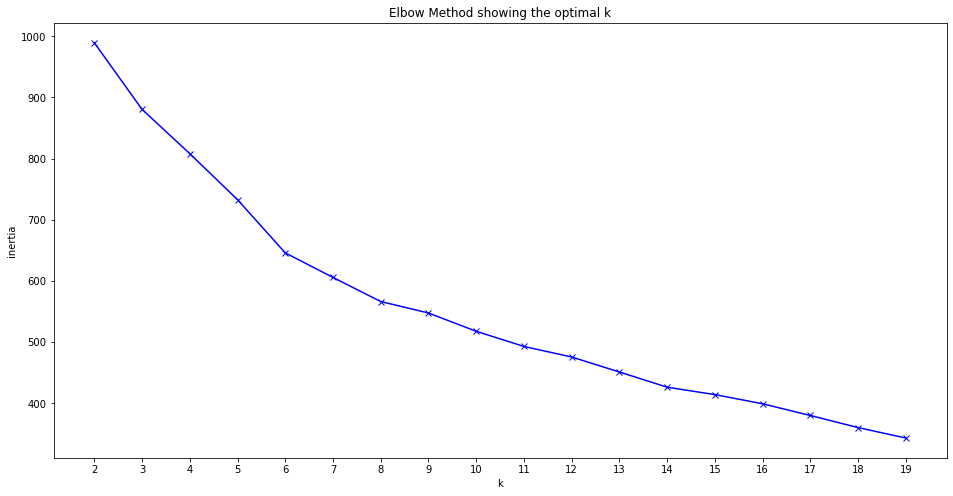

In [30]:
#  "elbow method" to choose the best K.
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

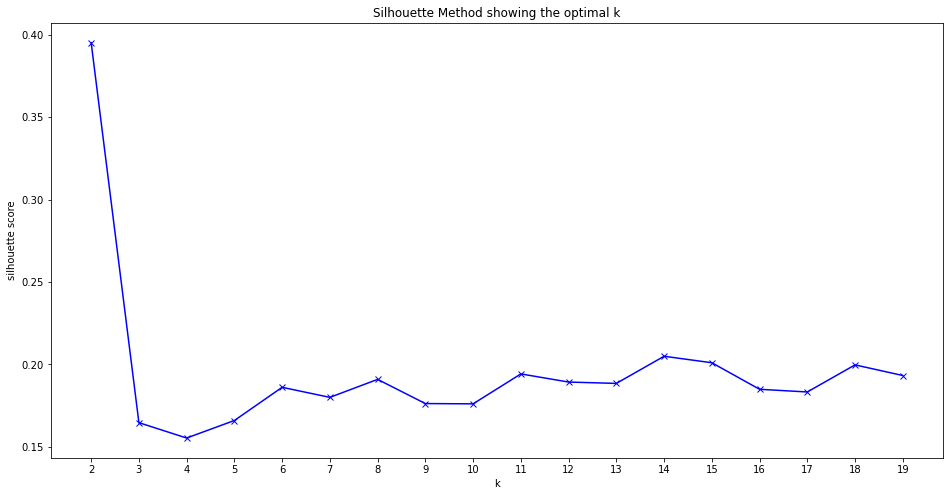

In [31]:
#silhouette
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

#  the greater the separation between the clusters, In other words, the clusters will be more defined. (high peak)

In [32]:
kmeans = KMeans(n_clusters=6,
                init="random",
                n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

742.7830136501215


In [33]:
# checking in which group they are
X_df = pd.DataFrame(X_prep)
X_df["cluster"] = clusters
X_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster
0,-0.287598,0.582743,1.767624,0.811495,-1.333333,1.314127,1.383990,-0.422759,0.717367,0.338104,1.531953,0.920023,0.135388,6
1,0.192069,0.202581,1.467008,0.705490,0.750000,-0.856727,-0.459895,-0.422759,-0.382841,0.017162,-1.045447,-0.495398,0.135388,4
2,0.843405,-0.464912,0.565159,-0.230156,0.750000,2.214427,-0.472524,-0.422759,-0.460870,0.463879,1.514369,-0.546666,0.135388,6
3,1.080714,0.003659,-1.539155,0.419902,0.750000,-0.450698,-0.194678,-0.422759,0.686155,0.255700,-0.450777,-0.416185,0.135388,0
4,0.994879,-0.120114,1.467008,0.391997,-1.333333,-0.218171,-0.770261,-0.422759,-0.250192,1.465741,-1.253092,-1.321755,0.135388,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.348317,-0.195263,-0.036074,-0.125087,0.750000,-0.801875,-0.867823,-0.367007,-0.929824,2.081604,-0.452205,-0.482538,0.135388,0
96,-2.332491,-2.474464,1.767624,-3.381144,0.750000,-0.773256,2.167010,2.901465,-0.398447,-1.702050,0.381797,-1.282899,0.135388,2
97,-0.777362,-0.296934,-1.238539,-0.443880,0.750000,1.188920,0.540981,-0.422759,-0.101937,0.997338,-1.355055,0.597672,0.135388,0
98,-0.040191,0.025762,-1.238539,-0.456819,-1.333333,3.472461,0.446261,-0.422759,1.302584,2.085941,1.507615,-0.995574,0.135388,6


In [34]:
def recommendator():
#     track = input('Input a song')
    track = 'Up'
    if track in df_songs['song'].values:
        # checking that it works
        print('Hot!')
        
        # getting the index of the song
        index = np.where(df_songs['song'].values == track)
        index = int(index[0])
        
        X = df_songs.select_dtypes('float64')
        X_prep = df_songs.select_dtypes('float64')
        
        
        
        X_prep = StandardScaler().fit_transform(X_prep)
        
        X_prep = pd.DataFrame(X_prep, columns=X.columns)
        
        kmeans = KMeans(n_clusters=8,
                init="random",
                n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
        kmeans.fit(X_prep)
        clusters = kmeans.predict(X_prep)
        
#         print(pd.Series(clusters).value_counts().sort_index())
        
        df_songs["cluster"] = clusters
        
        cluster_num = int(df_songs.loc[index]['cluster'])
#         cluster_num = int(song['cluster']) 
#         print(cluster_num)
#         return cluster_num
        print(cluster_num)
        same_cluster_songs =  pd.DataFrame(df_songs[df_songs['cluster'] == cluster_num], columns = df_songs.columns)
        return same_cluster_songs
        
    else:
        print('Cold!')

In [35]:
data = recommendator()

Hot!
2


<ipython-input-34-a356908817d0>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_songs["cluster"] = clusters


In [36]:
data

,artist,song,chart week,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,duration_ms,time_signature,cluster
1,Cardi B,Up,2021-02-23,0.654,0.630,10.0,-4.644,1.0,0.0259,0.1530,0.000000,0.1110,0.430,89.991,2wrJq5XKLnmhRXHIAf9xBa,spotify:track:2wrJq5XKLnmhRXHIAf9xBa,167693.0,4.0,2
8,Ariana Grande,Positions,2021-02-23,0.532,0.584,8.0,-5.254,1.0,0.0248,0.7230,0.000000,0.1010,0.367,88.003,0sKEilrw1GrBlG6qsTCrP4,spotify:track:0sKEilrw1GrBlG6qsTCrP4,190680.0,4.0,2
10,CJ,Whoopty,2021-02-23,0.654,0.630,10.0,-4.644,1.0,0.0259,0.1530,0.000000,0.1110,0.430,89.991,2wrJq5XKLnmhRXHIAf9xBa,spotify:track:2wrJq5XKLnmhRXHIAf9xBa,167693.0,4.0,2
11,Pop Smoke Featuring Lil Baby & DaBaby,For The Night,2021-02-23,0.777,0.712,10.0,-4.840,1.0,0.2770,0.2170,0.000000,0.0910,0.680,95.692,7KbF6AdprOXEEHlsq11Z6d,spotify:track:7KbF6AdprOXEEHlsq11Z6d,175733.0,4.0,2
19,Gabby Barrett Featuring Charlie Puth,I Hope,2021-02-23,0.600,0.535,4.0,-7.043,1.0,0.1070,0.6480,0.000005,0.1620,0.269,71.912,0CZ8lquoTX2Dkg7Ak2inwA,spotify:track:0CZ8lquoTX2Dkg7Ak2inwA,225133.0,4.0,2
29,Drake Featuring Lil Durk,Laugh Now Cry Later,2021-02-23,0.564,0.519,11.0,-7.878,1.0,0.0294,0.3730,0.000000,0.0938,0.350,81.028,3VGGcNF0O9loBSuLveZEUU,spotify:track:3VGGcNF0O9loBSuLveZEUU,222979.0,4.0,2
64,Jack Harlow,Tyler Herro,2021-02-23,0.632,0.548,7.0,-6.438,1.0,0.0842,0.1370,0.000000,0.1060,0.596,80.362,07t4ML5fFkVP9TzrbY1byX,spotify:track:07t4ML5fFkVP9TzrbY1byX,159000.0,4.0,2
71,Dustin Lynch,Momma's House,2021-02-23,0.461,0.161,8.0,-11.145,1.0,0.4050,0.8780,0.000000,0.1700,0.353,88.781,0H2MmFtJgoeywCIbAN3sid,spotify:track:0H2MmFtJgoeywCIbAN3sid,132000.0,3.0,2
72,Eric Church,Hell Of A View,2021-02-23,0.903,0.480,8.0,-8.340,1.0,0.1080,0.7170,0.000000,0.1060,0.673,98.022,1QC0kBXdJJZskViUhhpFSg,spotify:track:1QC0kBXdJJZskViUhhpFSg,176723.0,4.0,2
80,Pooh Shiesty Featuring 21 Savage,Box Of Churches,2021-02-23,0.485,0.834,9.0,-5.413,1.0,0.0715,0.0665,0.000000,0.2800,0.659,90.933,58spuRyMUsjKHQHEGwLC99,spotify:track:58spuRyMUsjKHQHEGwLC99,211767.0,4.0,2
